In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler ,OneHotEncoder,OrdinalEncoder

# methode univariee ex: iQR , z-score

et

# methode multivariee ex: LoF , Isolation Forest

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

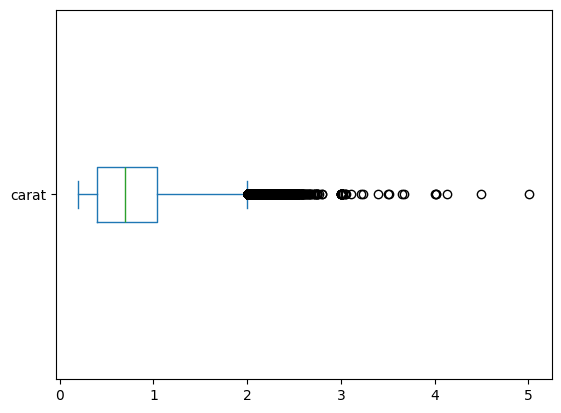

In [5]:
df['carat'].plot(kind="box",vert=False)

In [9]:
carat=df['carat']

q1=carat.quantile(0.25)
q3=carat.quantile(0.75)

iqr=q3-q1

iqr

np.float64(0.64)

In [10]:
lower_bound=q1 - 1.5 * iqr
upper_bound=q3 + 1.5 * iqr


In [13]:
lower_bound

np.float64(-0.5599999999999999)

In [14]:
upper_bound

np.float64(2.0)

In [16]:
outlier = df.query('carat < @lower_bound | carat > @upper_bound')

In [17]:
outlier

,carat,cut,color,clarity,depth,table,price,x,y,z
12246,2.06,Premium,J,I1,61.2,58.0,5203,8.10,8.07,4.95
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
13991,2.01,Fair,I,I1,67.4,58.0,5696,7.71,7.64,5.17
...,...,...,...,...,...,...,...,...,...,...
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11


# LOF

local outliers factor

In [18]:
from sklearn.neighbors import LocalOutlierFactor

data = np.concatenate( (df[['carat']].values, df[['depth']]),axis=1) 




/home/romaric420/Analyse/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


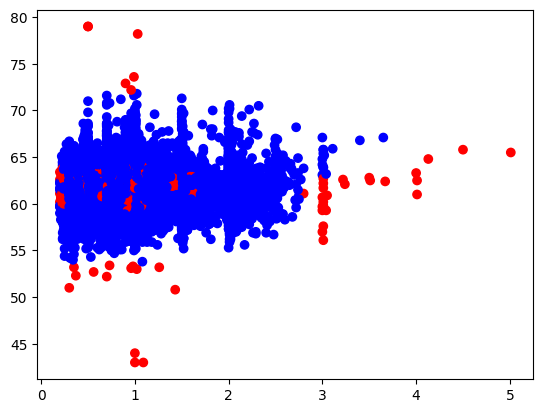

In [23]:
detection_model = LocalOutlierFactor(n_neighbors=50, contamination=0.1)
y_pred = detection_model.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c=y_pred,cmap='bwr_r')